In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def linearElementsMLE(N, koef, f, T0, T1):
    h = 1/(N - 1)
    l = np.zeros((2,N - 1), dtype = np.int8)
    for j in range(N - 1):
        l[0, j] = int(j)
        l[1, j] = int(j + 1)

    a = np.array([[1, -1], [-1, 1]]) * 1/h
    load_matrix = np.zeros((N, N))
    for k in range(N - 1):
        for i in range(2):
            for j in range(2):
                load_matrix[l[i, k], l[j, k]] +=  (koef[k] + koef[k + 1]) * a[i, j]/2
    
    F = np.zeros((2,N))
    for k in range(N - 1):
        F[0, k] = h / 6 * (2 * f[l[0, k]] + f[l[1, k]]) 
        F[1, k] = h / 6 * (2 * f[l[1, k]] + f[l[0, k]]) 
    load_vect = np.zeros(N)
    for k in range(N - 1):
        for i in range(2):
            load_vect[l[i, k]] += F[i, k]
    
    load_matrix[0, 0] = 1; load_matrix[0, 1] = 0
    load_vect[0] = T0
    
    load_matrix[-1, -1] = 1; load_matrix[-1, -2] = 0
    load_vect[-1] = T1
    return np.linalg.solve(load_matrix, load_vect)

In [87]:
def preciseSolution(k1, k2, f1, f2, T1, T2, x):
    matrix = np.array([[1 * k1, 0, -1 * k2, 0], [0, 1, 0, 0], [0, 0, 1, 1], [0.5, 1, -0.5, -1]])
    vect = np.array([0.5*(f1 - f2), T1, T2 + f2/2/k2, -(f2/k2- f1/k1)/8])
    const = np.linalg.solve(matrix, vect)
    sol = [ -f1/2/k1 * x**2 + const[0] * x + const[1] if x <= 0.5 else -f2/2/k2 * x**2 + const[2] * x + const[3] for x in x]
    return sol

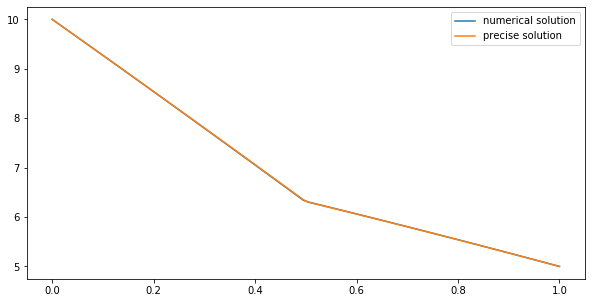

In [104]:
N = 100; f1 = 1; k1 = 2; f2 = 3; k2 = 6; T1 = 10; T2 = 5
x = np.linspace(0, 1, N)
f = [f1 if x[i] <= 0.5 else f2 for i in range(N)]
koef = np.array([k1 if x[i] <= 0.5 else k2 for i in range(N) ])
sol = linearElementsMLE(N, koef, f, T0 = T1, T1 = T2)
pres_sol = preciseSolution(k1, k2, f1, f2, T1, T2, x)
plt.figure(figsize = (10, 5))
plt.plot(x, sol, label = "numerical solution")
plt.plot(x, pres_sol, label = "precise solution")
plt.legend()